In [128]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df_main=pd.read_csv('voice.csv')
df=df_main
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Q NO 1

target is voice

onehotencoding

In [130]:
onhot=pd.get_dummies(df['label'])
onhot

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
3163,1,0
3164,1,0
3165,1,0
3166,1,0


In [131]:
df['label']=df['label'].map({'male':1,'female':0})
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [132]:
df.shape

(3168, 21)

In [133]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,0:19]
y=df['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=85)


Q NO 2

In [134]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [135]:
lg.fit(X_test,y_test)

LogisticRegression()

In [136]:
y_pred=lg.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.8454258675078864

In [138]:
lg.predict_proba(X_test)

array([[0.32722077, 0.67277923],
       [0.40534492, 0.59465508],
       [0.15472264, 0.84527736],
       ...,
       [0.33737698, 0.66262302],
       [0.43620411, 0.56379589],
       [0.39120285, 0.60879715]])

Q NO 3

<AxesSubplot:>

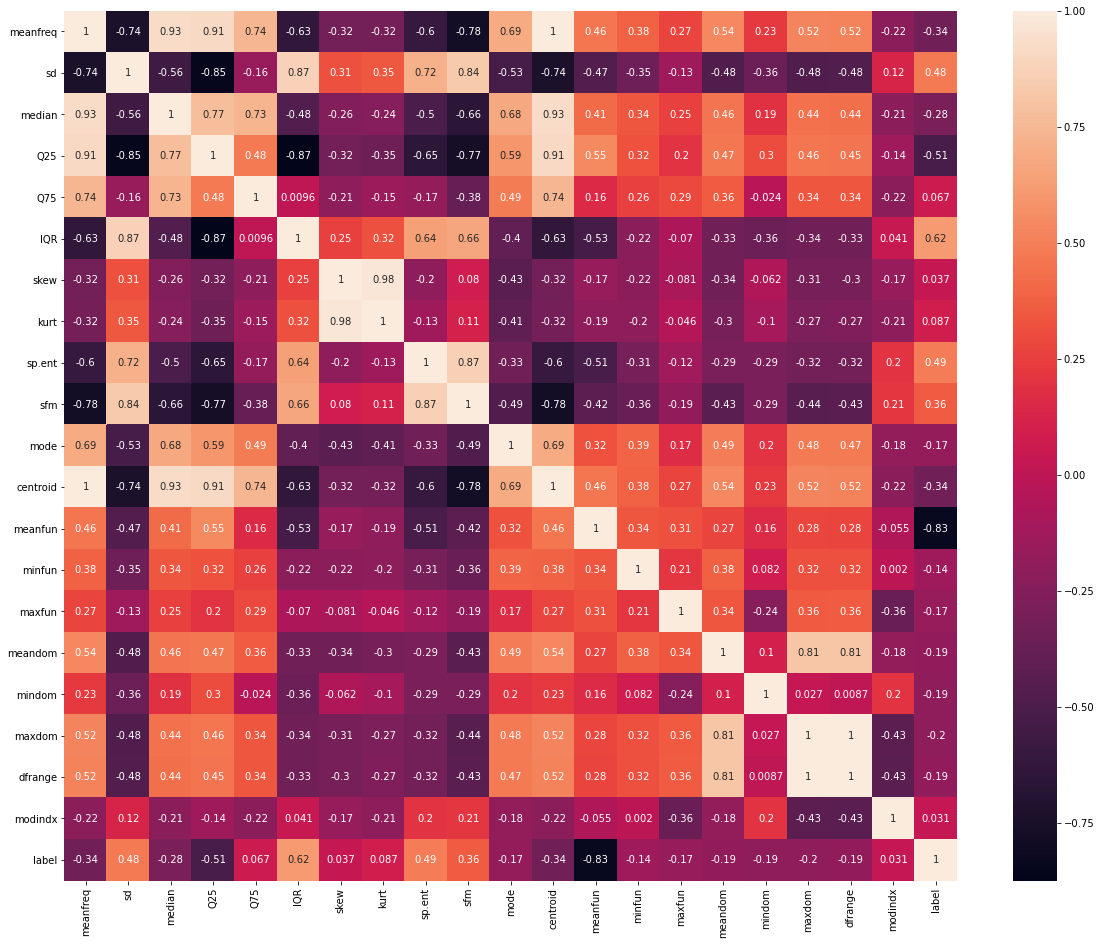

In [139]:
core=df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(core,annot=True)

strong corr

i)meanfreq with median,Q25,centroid

ii)Q25 with centroid


iii)median with centroid

iv)maxdom with dfrange and inverse is True

Q NO 4

In [140]:
X = X.drop("median",axis=1)
X = X.drop("Q25",axis=1)
X = X.drop("centroid",axis=1)
X = X.drop("dfrange",axis=1)
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.2,random_state=85)

lg.fit(X,y)


LogisticRegression()

In [141]:
y_prednew=lg.predict(X_test2)

accuracy_score(y_test2,y_prednew)

0.916403785488959

END